In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib import font_manager, rc
%matplotlib inline

# 글꼴 경로 지정
font_path = "c:/Windows/Fonts/malgun.ttf"  # 윈도우에 설치된 맑은 고딕 폰트 경로

# 폰트 이름 얻어오기
font_name = font_manager.FontProperties(fname=font_path).get_name()

# matplotlib의 rc(run command) 기능을 이용하여 글꼴 설정
mpl.rc('font', family=font_name)

# 유니코드에서  음수 부호 설정
mpl.rc('axes', unicode_minus=False)

path='../../../../../datasets/paris_listings.csv'
raw = pd.read_csv(path)
df = raw.copy()

df = df[['id', 'host_id','host_is_superhost',
        'host_total_listings_count','neighbourhood_cleansed','room_type','accommodates','bathrooms','bedrooms',
        'beds','amenities','price','minimum_nights','maximum_nights','number_of_reviews', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 
        'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
        'review_scores_location', 'review_scores_value', 'reviews_per_month','listing_url','property_type','number_of_reviews_ltm','has_availability','last_review']]

df = df.rename(columns= {
    'id': '숙소_id',
    'host_id': '호스트_id',
    'host_is_superhost': '슈퍼호스트',
    'host_total_listings_count': '숙소_수',
    'neighbourhood_cleansed': '숙소_지역',
    'room_type': '숙소_유형',
    'accommodates': '수용_인원수',
    'bathrooms': '욕실수',
    'bedrooms': '침실수',
    'beds': '침대수',
    'amenities': '편의시설',
    'price': '숙소_가격',
    'minimum_nights': '최소_숙박일',
    'maximum_nights': '최대_숙박일',
    'number_of_reviews': '리뷰수',
    'number_of_reviews_l30d': '30일_리뷰수',
    'review_scores_rating': '리뷰점수',
    'review_scores_accuracy': '숙소_정확성_리뷰점수',
    'review_scores_cleanliness': '숙소_청결도_리뷰점수',
    'review_scores_checkin': '숙소_체크인_리뷰점수',
    'review_scores_communication': '숙소_소통_리뷰점수',
    'review_scores_location': '숙소_위치_리뷰점수',
    'review_scores_value': '숙소_가격_리뷰점수',
    'reviews_per_month': '평균_리뷰수',
    'listing_url':'url',
    'property_type':'숙소_특징',
    'number_of_reviews_ltm':'12개월_리뷰수',
    'has_availability':'예약가능여부',
    'last_review':'마지막_리뷰'
})
df['위도']=raw['latitude']
df['경도']=raw['longitude']
print(len(df[df['리뷰수']==0]))
# 슈퍼호스트, 리뷰수 결측치 제거
print(f"처음 df : {len(df)}")
df = df[~df['슈퍼호스트'].isnull()]
print(f"슈퍼호스트 제거 : {len(df)}")
df = df[df['리뷰수']>2]
print(f"리뷰수 제거 : {len(df)}")

# 숙소가격 null값 제거
df= df[~df['숙소_가격'].isnull()]

#가격 앞 통화기호 제거
df['숙소_가격'] = df['숙소_가격'].replace('[\$,]', '', regex=True).astype(float)

# 유형 제거 
df = df[(df['숙소_유형']=='Entire home/apt') | (df['숙소_유형']=='Private room')]
print(f"숙소_유형 제거 : {len(df)}")

# 12개월 리뷰수 0 개 제거
df = df[df['12개월_리뷰수']!=0]
print(f"12개월_리뷰수 0개 제거 : {len(df)}")

# 욕실수, 침실수, 침대수 null값 제거
df = df.dropna(subset=['욕실수', '침실수', '침대수'])
print(f"욕실수, 침실수, 침대수 제거 후 : {len(df)}")

# 리뷰  null값 제거
df = df.dropna(subset=['숙소_정확성_리뷰점수','숙소_청결도_리뷰점수','숙소_체크인_리뷰점수','숙소_소통_리뷰점수','숙소_위치_리뷰점수','숙소_가격_리뷰점수'])
print(f"리뷰 결측치 제거 후 : {len(df)}")

# 예약 가능여부 f 버리기
df = df.dropna(subset='예약가능여부')
print(f"예약가능여부 : {len(df)}")

df_guest_prefer= df[(df['리뷰점수'] >= 4.9) & (df['리뷰수'] >= 5) & (df['슈퍼호스트'] == 't')]
df_non_guest_prefer = df[(df['슈퍼호스트'] == 'f') & (df['리뷰수'] >= 5)].sort_values('리뷰점수', ascending=True).head(4716)

25576
처음 df : 84397
슈퍼호스트 제거 : 84306
리뷰수 제거 : 47841
숙소_유형 제거 : 34280
12개월_리뷰수 0개 제거 : 31052
욕실수, 침실수, 침대수 제거 후 : 30997
리뷰 결측치 제거 후 : 30997
예약가능여부 : 30990


# 각 요소
- 처음 6000개
- 줄여야함
- 돌리는데만 2시간걸림 이렇게 할바엔 랜덤 개수만큼만

In [ ]:
# 모든 편의시설을 파싱하여 유니크한 편의시설 세트 생성
amenities_set = set()
amenities_set1 = set()
df_guest_prefer['편의시설'].apply(lambda x: amenities_set.update(eval(x)))
df_non_guest_prefer['편의시설'].apply(lambda x: amenities_set1.update(eval(x)))

# 각 편의시설에 대해 이진 특성 열을 데이터프레임에 추가
for amenity in amenities_set:
    df_guest_prefer[amenity] = df_guest_prefer['편의시설'].apply(lambda x: amenity in eval(x))

for amenity in amenities_set1:
    df_non_guest_prefer[amenity] = df_non_guest_prefer['편의시설'].apply(lambda x: amenity in eval(x))
    
# '편의시설' 열 삭제
df_guest_prefer.drop('편의시설', axis=1, inplace=True)
df_non_guest_prefer.drop('편의시설', axis=1, inplace=True)

C:\Users\ciw96\AppData\Local\Temp\ipykernel_24700\922118125.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_guest_prefer[amenity] = df_guest_prefer['편의시설'].apply(lambda x: amenity in eval(x))
C:\Users\ciw96\AppData\Local\Temp\ipykernel_24700\922118125.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_guest_prefer[amenity] = df_guest_prefer['편의시설'].apply(lambda x: amenity in eval(x))
C:\Users\ciw96\AppData\Local\Temp\ipykernel_24700\922118125.py:9: SettingWithCopyWarning: 
A value is trying to be

In [ ]:
df_guest_prefer.to_csv('../../../../../datasets/paris_prefer.csv',index=False)
df_non_guest_prefer.to_csv('../../../../../datasets/paris_non_prefer.csv',index=False)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib import font_manager, rc
%matplotlib inline

# 글꼴 경로 지정
font_path = "c:/Windows/Fonts/malgun.ttf"  # 윈도우에 설치된 맑은 고딕 폰트 경로

# 폰트 이름 얻어오기
font_name = font_manager.FontProperties(fname=font_path).get_name()

# matplotlib의 rc(run command) 기능을 이용하여 글꼴 설정
mpl.rc('font', family=font_name)

# 유니코드에서  음수 부호 설정
mpl.rc('axes', unicode_minus=False)

df_guest_prefer = pd.read_csv('../../../../../datasets/paris_prefer.csv')
df_non_guest_prefer= pd.read_csv('../../../../../datasets/paris_non_prefer.csv')

In [4]:
# 모든 열 이름을 소문자로 변환하여 찾기
tv_columns = [col for col in df_guest_prefer.columns if 'tv' in col.lower()]
wifi_columns = [col for col in df_guest_prefer.columns if 'wifi' in col.lower()]
shampoo_columns = [
    col for col in df_guest_prefer.columns if 'body soap' in col.lower() or 'shampoo' in col.lower() or 'conditioner' in col.lower()
]
oven_columns = [col for col in df_guest_prefer.columns if 'oven' in col.lower()]
stove_columns = [col for col in df_guest_prefer.columns if 'stove' in col.lower()]
housekeeping_columns = [col for col in df_guest_prefer.columns if 'housekeeping' in col.lower()]
sound_columns = [col for col in df_guest_prefer.columns if 'sound' in col.lower()]
refrigerator_columns = [col for col in df_guest_prefer.columns if 'refrigerator' in col.lower()]
parking_columns = [col for col in df_guest_prefer.columns if 'parking' in col.lower()]
weights_columns = [
    col for col in df_guest_prefer.columns if 'weights' in col.lower() or 'exercise' in col.lower() or 'gym' in col.lower()
]
game_columns = [col for col in df_guest_prefer.columns if 'game' in col.lower() ]
coffee_columns = [col for col in df_guest_prefer.columns if 'coffee' in col.lower() ]
pool_columns = [col for col in df_guest_prefer.columns if 'pool' in col.lower() ]

# 개수 확인
print(f"tv_columns  개수 : {len(tv_columns)}")
print(f"wifi_columns  개수 : {len(wifi_columns)}")
print(f"shampoo_columns  개수 : {len(shampoo_columns)}")
print(f"oven_columns  개수 : {len(oven_columns)}")
print(f"stove_columns  개수 : {len(stove_columns)}")
print(f"housekeeping_columns  개수 : {len(housekeeping_columns)}")
print(f"sound_columns  개수 : {len(sound_columns)}")
print(f"refrigerator_columns  개수 : {len(refrigerator_columns)}")
print(f"parking_columns  개수 : {len(parking_columns)}")
print(f"weights_columns  개수 : {len(weights_columns)}")
print(f"game_columns  개수 : {len(game_columns)}")
print(f"coffee_columns  개수 : {len(coffee_columns)}")
print(f"pool_columns  개수 : {len(pool_columns)}")

# 하나의  열 생성
df_guest_prefer['tv'] = df_guest_prefer[tv_columns].any(axis=1)
df_guest_prefer['wifi'] = df_guest_prefer[wifi_columns].any(axis=1)
df_guest_prefer['shampoo'] = df_guest_prefer[shampoo_columns].any(axis=1)
df_guest_prefer['oven'] = df_guest_prefer[oven_columns].any(axis=1)
df_guest_prefer['stove'] = df_guest_prefer[stove_columns].any(axis=1)
df_guest_prefer['housekeeping'] = df_guest_prefer[housekeeping_columns].any(axis=1)
df_guest_prefer['sound'] = df_guest_prefer[sound_columns].any(axis=1)
df_guest_prefer['refrigerator'] = df_guest_prefer[refrigerator_columns].any(axis=1)
df_guest_prefer['parking'] = df_guest_prefer[parking_columns].any(axis=1)
df_guest_prefer['weights'] = df_guest_prefer[weights_columns].any(axis=1)
df_guest_prefer['game'] = df_guest_prefer[game_columns].any(axis=1)
df_guest_prefer['coffee'] = df_guest_prefer[coffee_columns].any(axis=1)
df_guest_prefer['pool'] = df_guest_prefer[pool_columns].any(axis=1)



# 모든 열 리스트를 하나로 합치기
all_columns_to_drop = tv_columns + wifi_columns + shampoo_columns + oven_columns + stove_columns + housekeeping_columns + sound_columns + refrigerator_columns + parking_columns + weights_columns + game_columns + coffee_columns + pool_columns

# 리스트에서 중복 제거
columns_to_drop = list(set(all_columns_to_drop))

# 일괄 삭제
df_guest_prefer.drop(columns=columns_to_drop, inplace=True)


tv_columns  개수 : 629
wifi_columns  개수 : 491
shampoo_columns  개수 : 614
oven_columns  개수 : 222
stove_columns  개수 : 135
housekeeping_columns  개수 : 19
sound_columns  개수 : 255
refrigerator_columns  개수 : 145
parking_columns  개수 : 32
weights_columns  개수 : 25
game_columns  개수 : 19
coffee_columns  개수 : 35
pool_columns  개수 : 36


In [5]:
# 모든 열 이름을 소문자로 변환하여 찾기
tv_columns = [col for col in df_non_guest_prefer.columns if 'tv' in col.lower()]
wifi_columns = [col for col in df_non_guest_prefer.columns if 'wifi' in col.lower()]
shampoo_columns = [
    col for col in df_non_guest_prefer.columns if 'body soap' in col.lower() or 'shampoo' in col.lower() or 'conditioner' in col.lower()
]
oven_columns = [col for col in df_non_guest_prefer.columns if 'oven' in col.lower()]
stove_columns = [col for col in df_non_guest_prefer.columns if 'stove' in col.lower()]
housekeeping_columns = [col for col in df_non_guest_prefer.columns if 'housekeeping' in col.lower()]
sound_columns = [col for col in df_non_guest_prefer.columns if 'sound' in col.lower()]
refrigerator_columns = [col for col in df_non_guest_prefer.columns if 'refrigerator' in col.lower()]
parking_columns = [col for col in df_non_guest_prefer.columns if 'parking' in col.lower()]
weights_columns = [
    col for col in df_non_guest_prefer.columns if 'weights' in col.lower() or 'exercise' in col.lower() or 'gym' in col.lower()
]
game_columns = [col for col in df_non_guest_prefer.columns if 'game' in col.lower() ]
coffee_columns = [col for col in df_non_guest_prefer.columns if 'coffee' in col.lower() ]
pool_columns = [col for col in df_non_guest_prefer.columns if 'pool' in col.lower() ]

# 개수 확인
print(f"tv_columns  개수 : {len(tv_columns)}")
print(f"wifi_columns  개수 : {len(wifi_columns)}")
print(f"shampoo_columns  개수 : {len(shampoo_columns)}")
print(f"oven_columns  개수 : {len(oven_columns)}")
print(f"stove_columns  개수 : {len(stove_columns)}")
print(f"housekeeping_columns  개수 : {len(housekeeping_columns)}")
print(f"sound_columns  개수 : {len(sound_columns)}")
print(f"refrigerator_columns  개수 : {len(refrigerator_columns)}")
print(f"parking_columns  개수 : {len(parking_columns)}")
print(f"weights_columns  개수 : {len(weights_columns)}")
print(f"game_columns  개수 : {len(game_columns)}")
print(f"coffee_columns  개수 : {len(coffee_columns)}")
print(f"pool_columns  개수 : {len(pool_columns)}")

# 하나의  열 생성
df_non_guest_prefer['tv'] = df_non_guest_prefer[tv_columns].any(axis=1)
df_non_guest_prefer['wifi'] = df_non_guest_prefer[wifi_columns].any(axis=1)
df_non_guest_prefer['shampoo'] = df_non_guest_prefer[shampoo_columns].any(axis=1)
df_non_guest_prefer['oven'] = df_non_guest_prefer[oven_columns].any(axis=1)
df_non_guest_prefer['stove'] = df_non_guest_prefer[stove_columns].any(axis=1)
df_non_guest_prefer['housekeeping'] = df_non_guest_prefer[housekeeping_columns].any(axis=1)
df_non_guest_prefer['sound'] = df_non_guest_prefer[sound_columns].any(axis=1)
df_non_guest_prefer['refrigerator'] = df_non_guest_prefer[refrigerator_columns].any(axis=1)
df_non_guest_prefer['parking'] = df_non_guest_prefer[parking_columns].any(axis=1)
df_non_guest_prefer['weights'] = df_non_guest_prefer[weights_columns].any(axis=1)
df_non_guest_prefer['game'] = df_non_guest_prefer[game_columns].any(axis=1)
df_non_guest_prefer['coffee'] = df_non_guest_prefer[coffee_columns].any(axis=1)
df_non_guest_prefer['pool'] = df_non_guest_prefer[pool_columns].any(axis=1)



# 모든 열 리스트를 하나로 합치기
all_columns_to_drop = tv_columns + wifi_columns + shampoo_columns + oven_columns + stove_columns + housekeeping_columns + sound_columns + refrigerator_columns + parking_columns + weights_columns + game_columns + coffee_columns + pool_columns

# 리스트에서 중복 제거
columns_to_drop = list(set(all_columns_to_drop))

# 일괄 삭제
df_non_guest_prefer.drop(columns=columns_to_drop, inplace=True)


print(df)

tv_columns  개수 : 237
wifi_columns  개수 : 151
shampoo_columns  개수 : 202
oven_columns  개수 : 69
stove_columns  개수 : 54
housekeeping_columns  개수 : 7
sound_columns  개수 : 61
refrigerator_columns  개수 : 68
parking_columns  개수 : 24
weights_columns  개수 : 14
game_columns  개수 : 17
coffee_columns  개수 : 25
pool_columns  개수 : 20


NameError: name 'df' is not defined

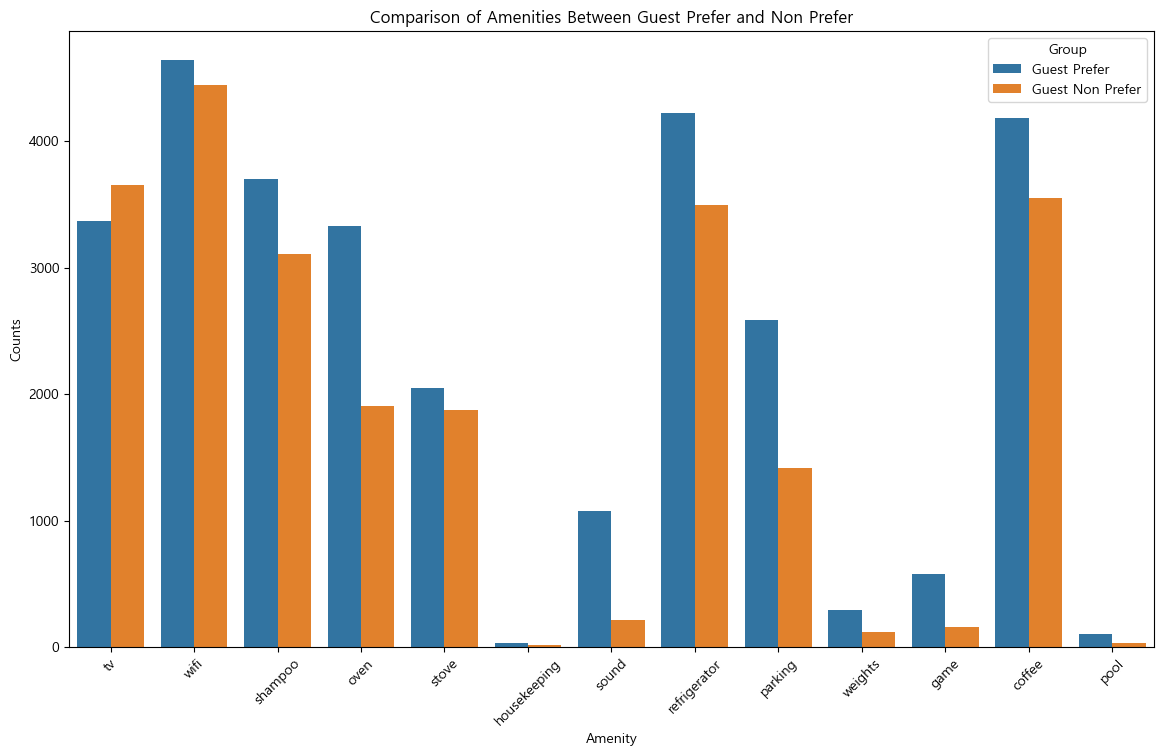

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 편의시설 요소 목록
amenities = ['tv', 'wifi', 'shampoo', 'oven', 'stove', 'housekeeping', 'sound', 'refrigerator', 'parking', 'weights', 'game', 'coffee', 'pool']

# 각 데이터프레임에 대해 편의시설의 True 개수를 계산하고 비교
results = []

for amenity in amenities:
    prefer_count = df_guest_prefer[amenity].sum()
    non_prefer_count = df_non_guest_prefer[amenity].sum()
    results.append({
        'Amenity': amenity,
        'Guest Prefer': prefer_count,
        'Guest Non Prefer': non_prefer_count
    })

# 결과 DataFrame 생성
comparison_df = pd.DataFrame(results)
comparison_df_melted = comparison_df.melt(id_vars='Amenity', value_vars=['Guest Prefer', 'Guest Non Prefer'], var_name='Type', value_name='Counts')

# 시각화
plt.figure(figsize=(14, 8))
sns.barplot(x='Amenity', y='Counts', hue='Type', data=comparison_df_melted)

plt.xticks(rotation=45)
plt.ylabel('Counts')
plt.title('Comparison of Amenities Between Guest Prefer and Non Prefer')
plt.legend(title='Group')
plt.show()


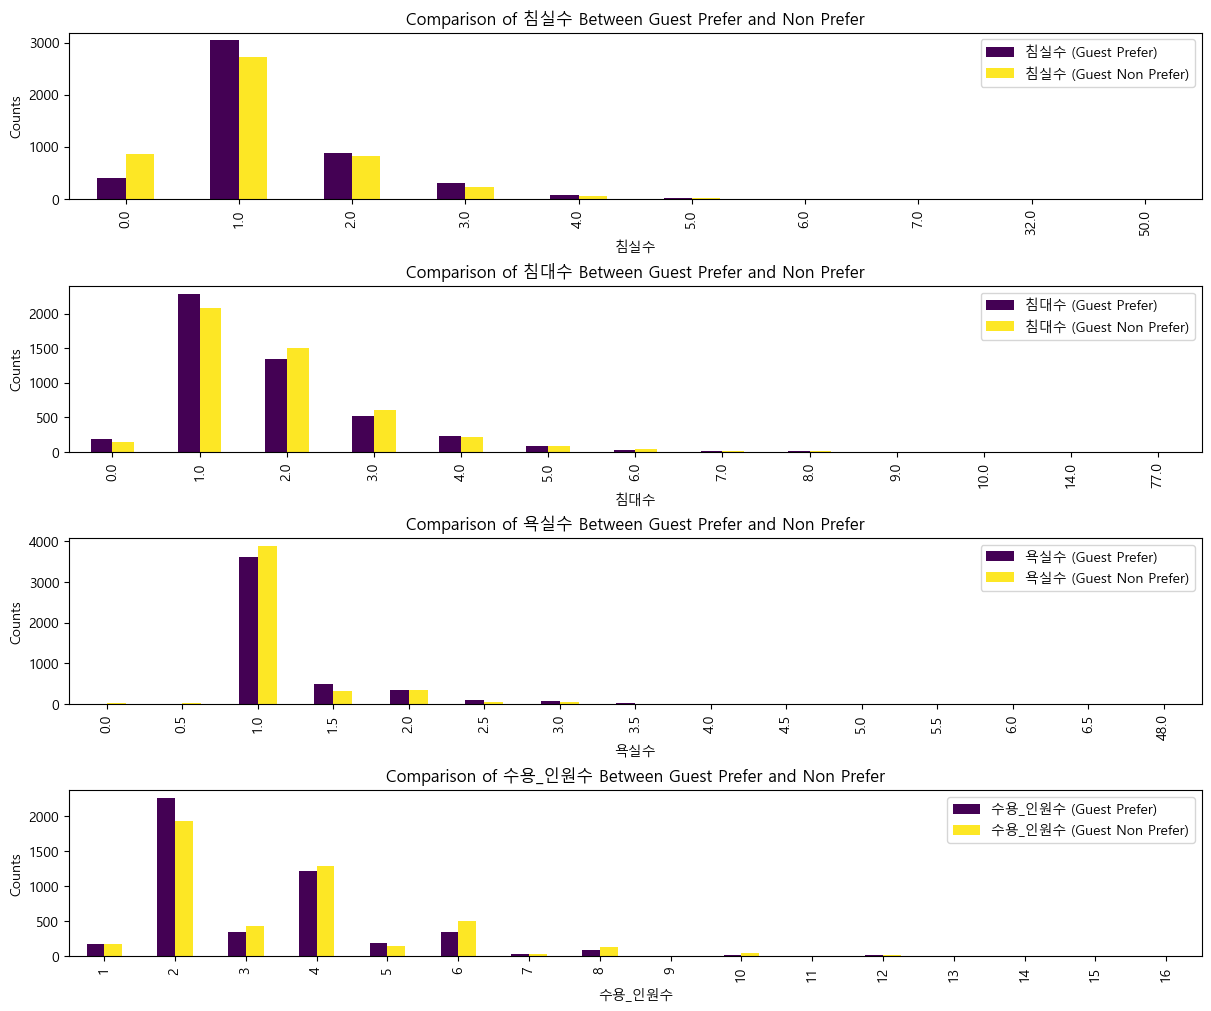

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 관련 열 선택
relevant_columns = ['침실수','침대수', '욕실수', '수용_인원수']

# 결과 저장을 위한 리스트
results = []

# df_guest_prefer와 df_guest_non_prefer에서 각 열의 개수를 카운트
for col in relevant_columns:
    # Guest Prefer
    prefer_counts = df_guest_prefer[col].value_counts().sort_index()
    # Guest Non Prefer
    non_prefer_counts = df_non_guest_prefer[col].value_counts().sort_index()

    # 결과 데이터프레임 생성
    df_prefer = pd.DataFrame({f'{col} (Guest Prefer)': prefer_counts})
    df_non_prefer = pd.DataFrame({f'{col} (Guest Non Prefer)': non_prefer_counts})
    df_combined = pd.merge(df_prefer, df_non_prefer, left_index=True, right_index=True, how='outer').fillna(0)
    results.append(df_combined)

# 결과 시각화
fig, axes = plt.subplots(nrows=len(relevant_columns), figsize=(12, 10), constrained_layout=True)

for i, df in enumerate(results):
    ax = axes[i] if len(relevant_columns) > 1 else axes
    df.plot(kind='bar', ax=ax, colormap='viridis')
    ax.set_title(f'Comparison of {relevant_columns[i]} Between Guest Prefer and Non Prefer')
    ax.set_xlabel(relevant_columns[i])
    ax.set_ylabel('Counts')
    ax.legend()

plt.show()


In [8]:
df_guest_prefer['침실수'].unique()

array([1., 0., 2., 3., 4., 5., 7., 6.])

In [9]:
df_non_guest_prefer['침실수'].unique()

array([ 1.,  0.,  2.,  5.,  3.,  4.,  7.,  6., 32., 50.])

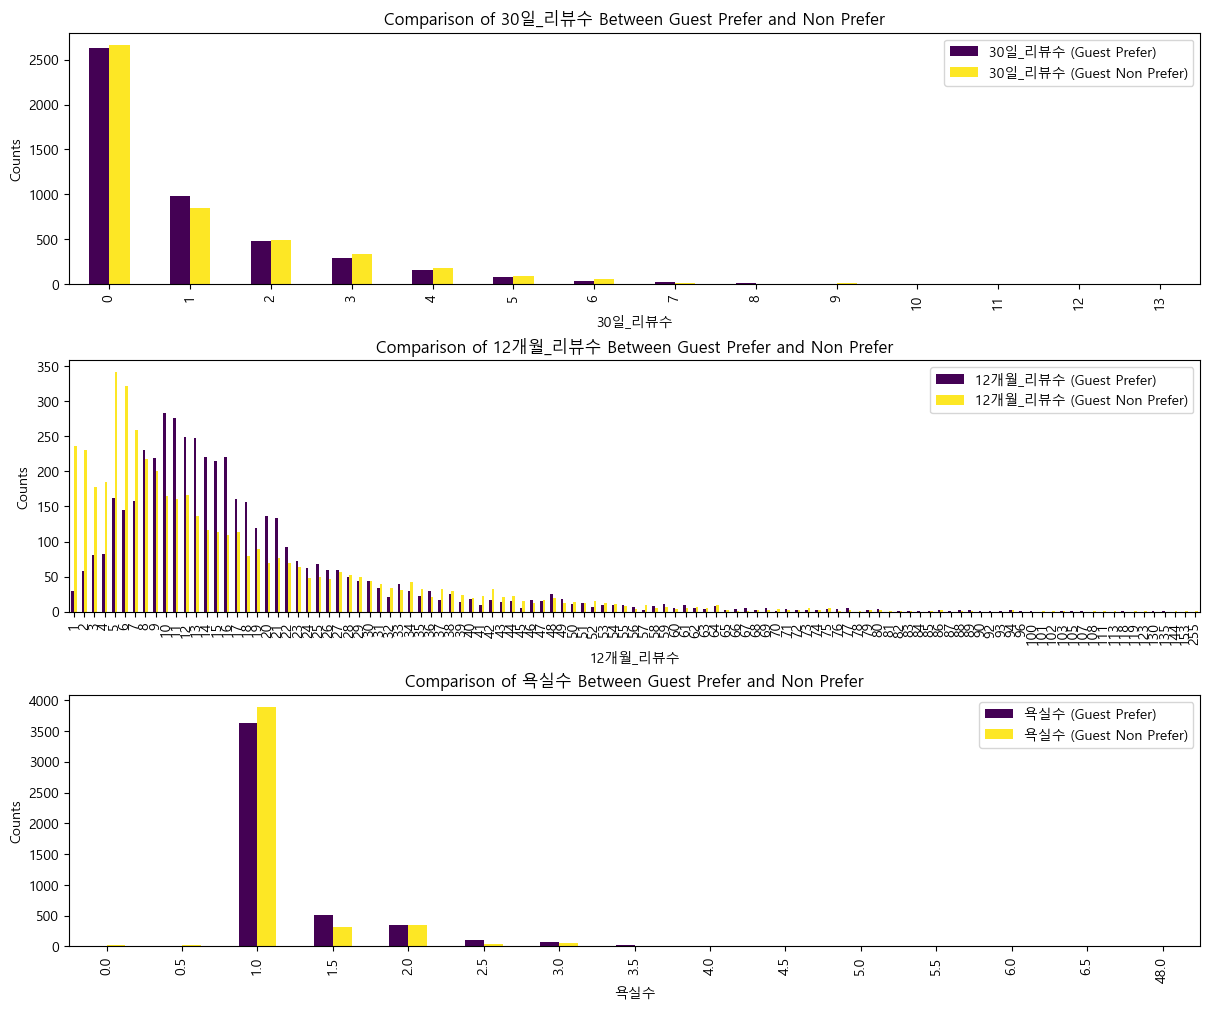

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 관련 열 선택
relevant_columns = ['30일_리뷰수','12개월_리뷰수', '욕실수']

# 결과 저장을 위한 리스트
results = []

# df_guest_prefer와 df_guest_non_prefer에서 각 열의 개수를 카운트
for col in relevant_columns:
    # Guest Prefer
    prefer_counts = df_guest_prefer[col].value_counts().sort_index()
    # Guest Non Prefer
    non_prefer_counts = df_non_guest_prefer[col].value_counts().sort_index()

    # 결과 데이터프레임 생성
    df_prefer = pd.DataFrame({f'{col} (Guest Prefer)': prefer_counts})
    df_non_prefer = pd.DataFrame({f'{col} (Guest Non Prefer)': non_prefer_counts})
    df_combined = pd.merge(df_prefer, df_non_prefer, left_index=True, right_index=True, how='outer').fillna(0)
    results.append(df_combined)

# 결과 시각화
fig, axes = plt.subplots(nrows=len(relevant_columns), figsize=(12, 10), constrained_layout=True)

for i, df in enumerate(results):
    ax = axes[i] if len(relevant_columns) > 1 else axes
    df.plot(kind='bar', ax=ax, colormap='viridis')
    ax.set_title(f'Comparison of {relevant_columns[i]} Between Guest Prefer and Non Prefer')
    ax.set_xlabel(relevant_columns[i])
    ax.set_ylabel('Counts')
    ax.legend()

plt.show()


In [11]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


# 이거 렉 너무걸림

In [ ]:
# import folium

# # 파리 중심부의 위도와 경도 설정
# paris_latitude = 48.8566
# paris_longitude = 2.3522

# # 파리 지도 생성
# map_paris = folium.Map(location=[paris_latitude, paris_longitude], zoom_start=12)

# # df_guest_prefer의 위치 표시 (녹색 마커로 표시)
# for idx, row in df_guest_prefer.iterrows():
#     folium.Marker(
#         location=[row['위도'], row['경도']],
#         icon=folium.Icon(color='green', icon='info-sign'),
#         popup='Guest Prefer'
#     ).add_to(map_paris)

# # df_non_guest_prefer의 위치 표시 (빨간 마커로 표시)
# for idx, row in df_non_guest_prefer.iterrows():
#     folium.Marker(
#         location=[row['위도'], row['경도']],
#         icon=folium.Icon(color='red', icon='info-sign'),
#         popup='Non-Guest Prefer'
#     ).add_to(map_paris)

# # 지도 출력
# map_paris


In [27]:
import folium
from folium.plugins import MarkerCluster

# 파리 중심부의 위도와 경도
paris_latitude = 48.8566
paris_longitude = 2.3522

# 파리 지도 생성
map_paris = folium.Map(location=[paris_latitude, paris_longitude], zoom_start=12)

# 랜드마크 위치 데이터
landmarks = {
    "에펠탑": (48.8584, 2.2945),
    "루브르 박물관": (48.8606, 2.3376),
    "노트르담 대성당": (48.8529, 2.3500),
    "개선문": (48.8738, 2.2950),
    "가르니에 궁전": (48.8719, 2.3316),
    "사크레쾨르 대성당": (48.8867, 2.3431),
    "생트 샤펠": (48.8554, 2.3450),
    "알렉산드르 3세 다리": (48.8639, 2.3136),
    "마레 지구": (48.8575, 2.3588),
    "몽마르트": (48.8867, 2.3431),
    "팡테옹": (48.8463, 2.3460),
    "룩셈부르크 정원": (48.8462, 2.3371),
    "오르세 미술관": (48.8600, 2.3257),
    "샹젤리제 거리": (48.8696, 2.3079),
    "레 장발리드": (48.8565, 2.3126),
    "콩코르드 광장": (48.8656, 2.3211),
    "퐁피두 센터": (48.8606, 2.3522),
    "라 데팡스": (48.8900, 2.2400),
    "갤러리 라파예트": (48.8738, 2.3320),
    "그레뱅 박물관": (48.8718, 2.3422)
}

# 각 랜드마크에 대한 마커 추가
for landmark, (lat, lng) in landmarks.items():
    folium.Marker(
        location=[lat, lng],
        icon=folium.Icon(icon='star', color='blue'),
        popup=landmark
    ).add_to(map_paris)

# 클러스터 객체 생성
marker_cluster = MarkerCluster().add_to(map_paris)

# df_guest_prefer의 위치 표시 (클러스터에 추가)
for idx, row in df_guest_prefer.iterrows():
    folium.Marker(
        location=[row['위도'], row['경도']],
        icon=folium.Icon(color='green', icon='info-sign'),
        popup='Guest Prefer'
    ).add_to(marker_cluster)

# df_non_guest_prefer의 위치 표시 (클러스터에 추가)
for idx, row in df_non_guest_prefer.iterrows():
    folium.Marker(
        location=[row['위도'], row['경도']],
        icon=folium.Icon(color='red', icon='info-sign'),
        popup='Non-Guest Prefer'
    ).add_to(marker_cluster)


# 지도를 HTML 파일로 저장
map_paris.save('paris_landmarks_map.html')


In [ ]:
import folium
from folium.plugins import MarkerCluster

# 런던 중심부의 위도와 경도
london_latitude = 51.5074
london_longitude = -0.1278

# 런던 지도 생성
map_london = folium.Map(location=[london_latitude, london_longitude], zoom_start=12)

# 랜드마크 위치 데이터
landmarks = {
    "런던 아이": (51.5033, -0.1196),
    "타워 브리지": (51.5055, -0.0754),
    "버킹엄 궁전": (51.5014, -0.1419),
    "대영 박물관": (51.5194, -0.1270),
    "테이트 모던": (51.5076, -0.0994),
    "세인트 폴 대성당": (51.5138, -0.0984),
    "웨스트민스터 사원": (51.4993, -0.1273),
    "피카딜리 서커스": (51.5101, -0.1342),
    "하이드 파크": (51.5073, -0.1657),
    "캠든 마켓": (51.5416, -0.1469)
}

# 각 랜드마크에 대한 마커 추가
for landmark, (lat, lng) in landmarks.items():
    folium.Marker(
        location=[lat, lng],
        icon=folium.Icon(icon='star', color='blue'),
        popup=landmark
    ).add_to(map_london)

# 클러스터 객체 생성
marker_cluster = MarkerCluster().add_to(map_london)

# df_guest_prefer의 위치 표시 (클러스터에 추가)
for idx, row in df_guest_prefer.iterrows():
    folium.Marker(
        location=[row['위도'], row['경도']],
        icon=folium.Icon(color='green', icon='info-sign'),
        popup='Guest Prefer'
    ).add_to(marker_cluster)

# df_non_guest_prefer의 위치 표시 (클러스터에 추가)
for idx, row in df_non_guest_prefer.iterrows():
    folium.Marker(
        location=[row['위도'], row['경도']],
        icon=folium.Icon(color='red', icon='info-sign'),
        popup='Non-Guest Prefer'
    ).add_to(marker_cluster)

# 지도를 HTML 파일로 저장
map_london.save('london_landmarks_map.html')

In [13]:
pip install geopy


Note: you may need to restart the kernel to use updated packages.


In [14]:
from geopy.distance import geodesic

# 특정 랜드마크와의 거리 계산 함수 정의
def count_accommodations_within_distance(df, landmark_coords, max_distance_km):
    count = 0
    for idx, row in df.iterrows():
        # 숙소 위치
        accommodation_location = (row['위도'], row['경도'])
        # 랜드마크와 숙소 간의 거리 계산
        distance = geodesic(landmark_coords, accommodation_location).km
        # 특정 거리 이내에 있으면 카운트
        if distance <= max_distance_km:
            count += 1
    return count

# 각 랜드마크와의 거리 계산
landmark_distances = {}
for landmark, coords in landmarks.items():
    count_prefer = count_accommodations_within_distance(df_guest_prefer, coords, 1)  # 1km 이내
    count_non_prefer = count_accommodations_within_distance(df_non_guest_prefer, coords, 1)  # 1km 이내
    landmark_distances[landmark] = {'Guest Prefer': count_prefer, 'Non-Guest Prefer': count_non_prefer}

# 결과 출력
for landmark, counts in landmark_distances.items():
    print(f"{landmark}:  1km 내 게스트 선호: {counts['Guest Prefer']}, 게스트 불호: {counts['Non-Guest Prefer']}")


에펠탑:  1km 내 게스트 선호: 167, 게스트 불호: 160
루브르 박물관:  1km 내 게스트 선호: 318, 게스트 불호: 339
노트르담 대성당:  1km 내 게스트 선호: 382, 게스트 불호: 352
개선문:  1km 내 게스트 선호: 176, 게스트 불호: 207
가르니에 궁전:  1km 내 게스트 선호: 230, 게스트 불호: 303
사크레쾨르 대성당:  1km 내 게스트 선호: 529, 게스트 불호: 397
생트 샤펠:  1km 내 게스트 선호: 387, 게스트 불호: 376
알렉산드르 3세 다리:  1km 내 게스트 선호: 87, 게스트 불호: 120
마레 지구:  1km 내 게스트 선호: 524, 게스트 불호: 490
몽마르트:  1km 내 게스트 선호: 529, 게스트 불호: 397
팡테옹:  1km 내 게스트 선호: 228, 게스트 불호: 221
룩셈부르크 정원:  1km 내 게스트 선호: 224, 게스트 불호: 219
오르세 미술관:  1km 내 게스트 선호: 114, 게스트 불호: 88
샹젤리제 거리:  1km 내 게스트 선호: 97, 게스트 불호: 153
레 장발리드:  1km 내 게스트 선호: 102, 게스트 불호: 90
콩코르드 광장:  1km 내 게스트 선호: 111, 게스트 불호: 88
퐁피두 센터:  1km 내 게스트 선호: 597, 게스트 불호: 694
라 데팡스:  1km 내 게스트 선호: 0, 게스트 불호: 0
갤러리 라파예트:  1km 내 게스트 선호: 254, 게스트 불호: 347
그레뱅 박물관:  1km 내 게스트 선호: 428, 게스트 불호: 626


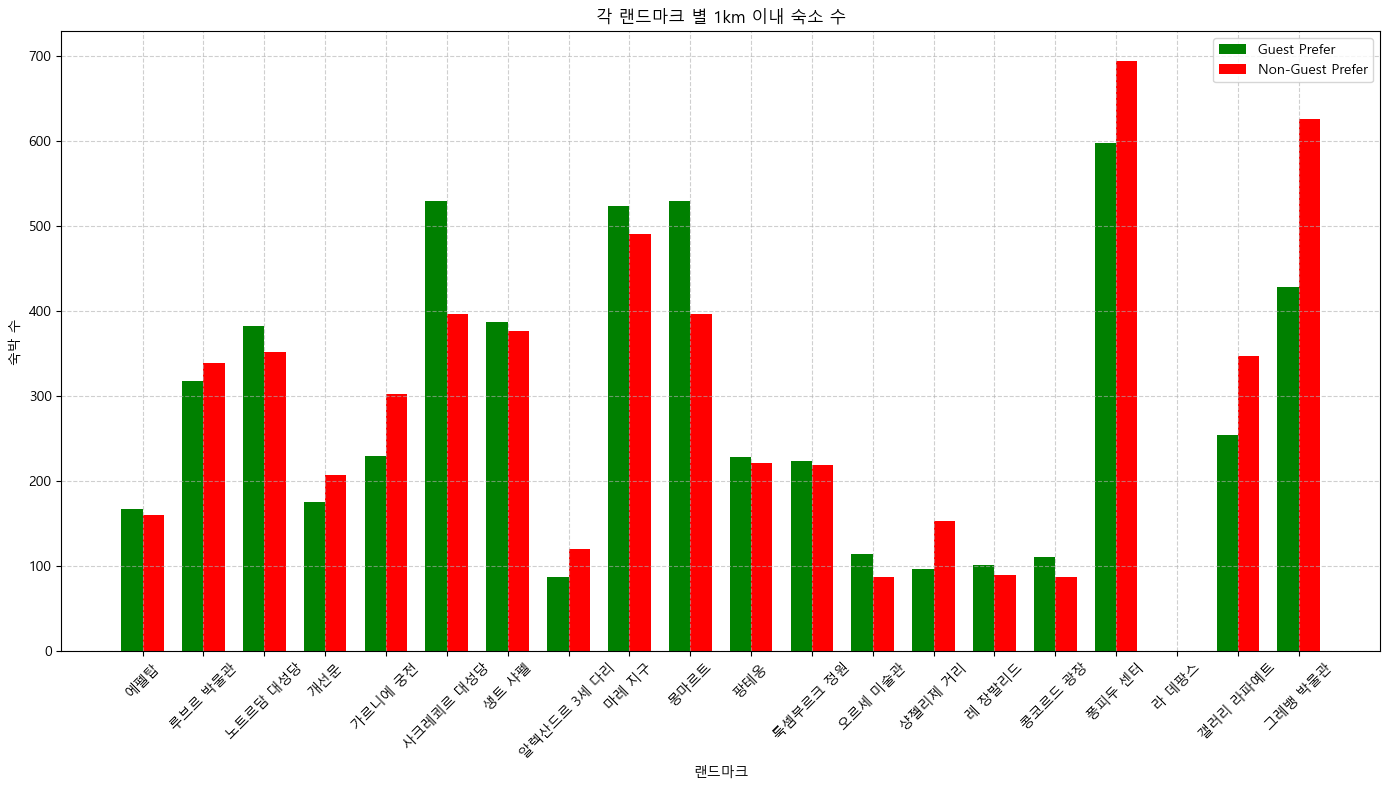

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 

# 랜드마크 거리 데이터 프레임 생성
landmark_df = pd.DataFrame(landmark_distances).T  # 행과 열 전환

# 시각화
fig, ax = plt.subplots(figsize=(14, 8))

# 막대 너비 설정
bar_width = 0.35
index = np.arange(len(landmark_df))  # 위치 인덱스 생성, numpy를 사용

# 각 그룹 별 막대 그래프 생성
bars1 = plt.bar(index, landmark_df['Guest Prefer'], bar_width, label='Guest Prefer', color='green')
bars2 = plt.bar(index + bar_width, landmark_df['Non-Guest Prefer'], bar_width, label='Non-Guest Prefer', color='red')

# 그래프 제목, 레이블 설정
plt.xlabel('랜드마크')
plt.ylabel('숙박 수')
plt.title('각 랜드마크 별 1km 이내 숙소 수')
plt.xticks(index + bar_width / 2, landmark_df.index, rotation=45)
plt.legend()

# 그리드 추가
plt.grid(True, linestyle='--', alpha=0.6)

# 그래프 표시
plt.tight_layout()
plt.show()


C:\Users\ciw96\AppData\Local\Temp\ipykernel_33332\1520057193.py:21: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(data=[prices_prefer_clean, prices_non_prefer_clean], palette=["green", "red"])


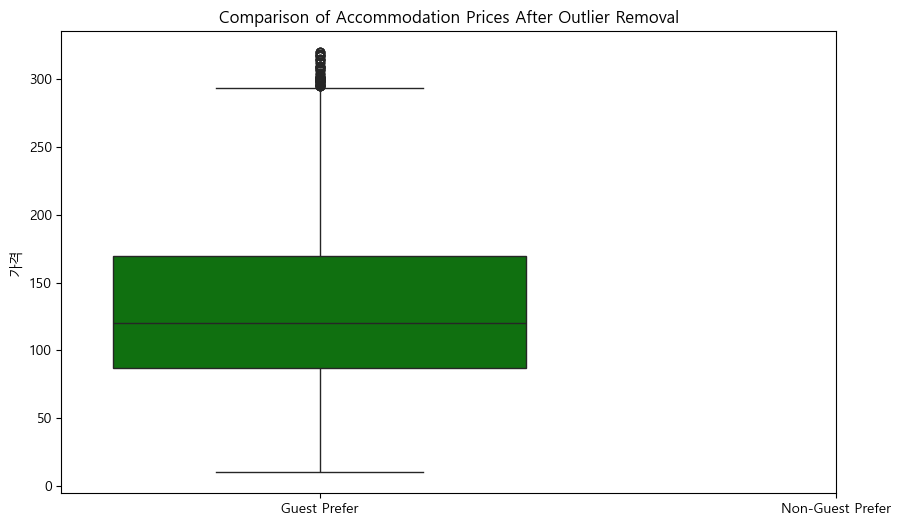

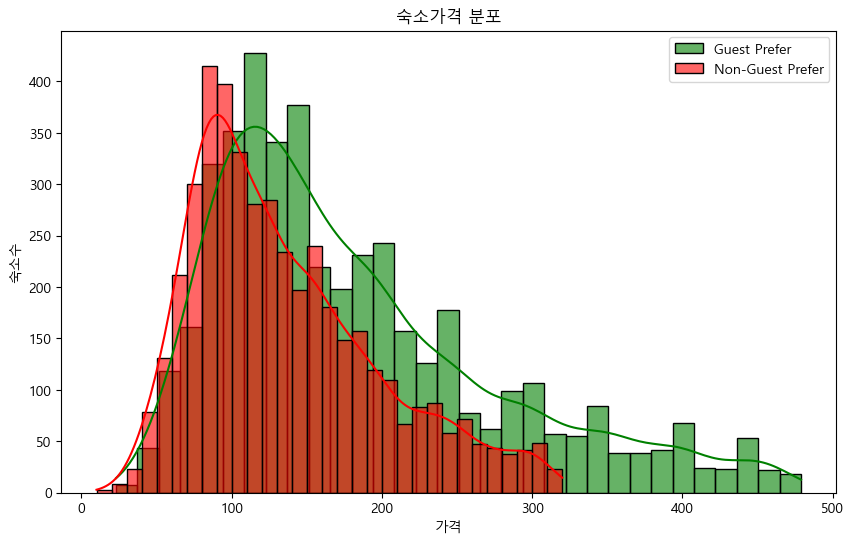

In [23]:

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 이상치가 아닌 데이터만 반환
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# 이상치 제거
df_guest_prefer_clean = remove_outliers(df_guest_prefer, '숙소_가격')
df_non_guest_prefer_clean = remove_outliers(df_non_guest_prefer, '숙소_가격')

# 로그 변환된 가격 준비
prices_prefer_clean = df_guest_prefer_clean['숙소_가격']
prices_non_prefer_clean = df_non_guest_prefer_clean['숙소_가격']

# 박스 플롯 생성
plt.figure(figsize=(10, 6))
sns.boxplot(data=[prices_prefer_clean, prices_non_prefer_clean], palette=["green", "red"])
plt.xticks([0, 1], ['Guest Prefer', 'Non-Guest Prefer'])
plt.title('Comparison of Accommodation Prices After Outlier Removal')
plt.ylabel('가격')
plt.show()


# 히스토그램 생성
plt.figure(figsize=(10, 6))
sns.histplot(prices_prefer_clean, color="green", kde=True, label='Guest Prefer', alpha=0.6)
sns.histplot(prices_non_prefer_clean, color="red", kde=True, label='Non-Guest Prefer', alpha=0.6)
plt.title('숙소가격 분포')
plt.xlabel('가격')
plt.ylabel('숙소수')
plt.legend()
plt.show()


In [25]:
print(df_guest_prefer.columns[30:])

Index(['Free dryer – In unit', 'Outdoor shower', 'Building staff',
       'Long term stays allowed', 'Theme room', 'High chair',
       'Folding or convertible high chair - always at the listing',
       'Dryer – In building', 'Indoor fireplace: gas, wood-burning', 'Hammock',
       ...
       'oven', 'stove', 'housekeeping', 'sound', 'refrigerator', 'parking',
       'weights', 'game', 'coffee', 'pool'],
      dtype='object', length=255)


In [26]:
# df_guest_prefer 데이터프레임의 칼럼 30번째부터 끝까지 추출
columns_after_30 = df_guest_prefer.columns[30:]

# 칼럼 이름을 데이터프레임으로 변환
columns_df = pd.DataFrame(columns_after_30, columns=["Column Names"])

# CSV 파일로 저장
columns_df.to_csv('Columns_after_30.csv', index=False)